In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis


KeyboardInterrupt: 

In [ ]:
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay

# create pile
pile = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="Layer 1 - medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="Layer 2 - Firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

print(sp)


/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
The method Pile.create() will be removed in version 1.0.0.
Please use the base class to create a Pile instead.
  # Remove the CWD from sys.path while we load stuff.


TypeError: __init__() got an unexpected keyword argument 'Neq'

In [ ]:
# Create Model
M = Model.create(name="", pile=pile, soil=sp)

# create point load
M.set_support(elevation=-30, Tx=True)
# M.set_support(elevation=0, Rz = True)
# M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0, Px=-20000, Py=10e3)


AttributeError: 'SoilProfile' object has no attribute 'water_elevation'

In [ ]:
result = simple_winkler_analysis(model=M)


In [ ]:
result.plot()


In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)

print(layer1)


In [ ]:
M.global_restrained


Text(0.5, 0, 'z [m]')

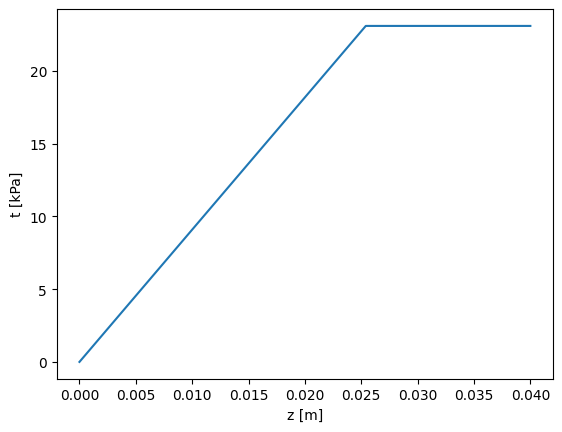

In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.tz_curves import api_sand

t, z = api_sand(50, 30)

plt.plot(z, t)
plt.ylabel("t [kPa]")
plt.xlabel("z [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

# Create Model
M = Model.create(name="", pile=p, soil=sp, distributed_moment=True)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral load
M.set_pointload(elevation=0, Px=-20e3, Py=5e3)

# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot()


/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
The method Pile.create() will be removed in version 1.0.0.
Please use the base class to create a Pile instead.
  del sys.path[0]


TypeError: __init__() got an unexpected keyword argument 'Neq'

Converged at iteration no. 7


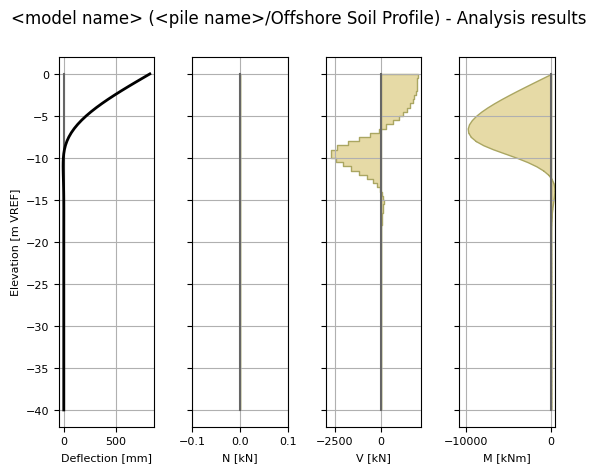

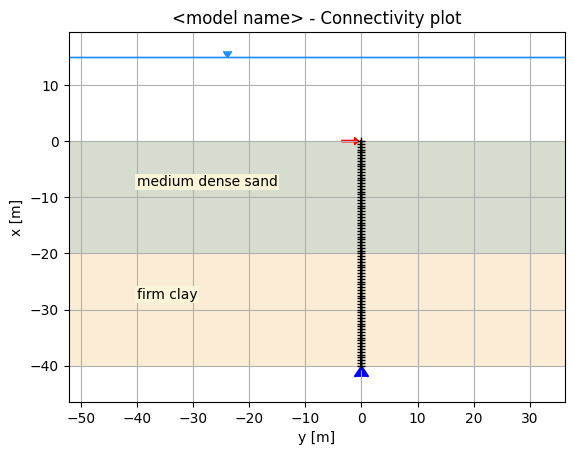

In [33]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=0.5, wt=0.075
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Px=-0e3, Py=2e3)

# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

# plot the results
Result.plot()

# plot the model (mesh, boundary conditions and soil profile)
M.plot()


In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


In [ ]:
from openpile.construct import SoilProfile, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

print(sp)


Layer 1
------------------------------
Name: medium dense sand
Elevation: (0.0) - (-20.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 33.0°
	cyclic curves
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer 2
------------------------------
Name: firm clay
Elevation: (-20.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 50.0-70.0 kPa
	eps50 = 0.015
	cyclic curves
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], kind="static"),
)

print(layer1)


Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	static curves
Axial model: None


Text(0.5, 0, 'y [m]')

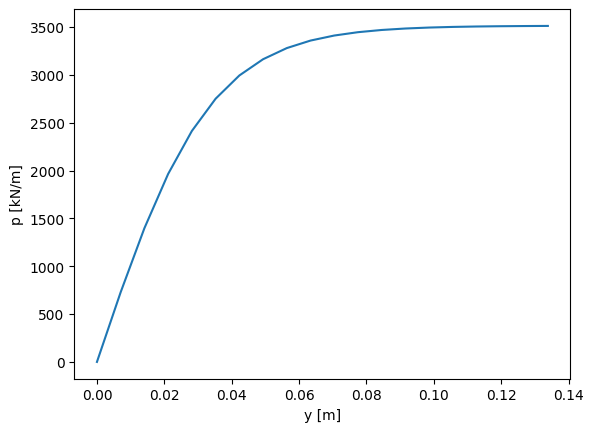

In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


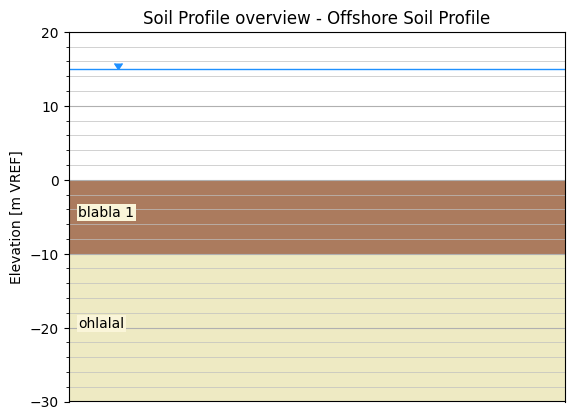

In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()


In [1]:
# import libraries
from openpile.construct import Pile, Model
from openpile.analyses import simple_beam_analysis

# create pile
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

M = Model(name="", pile=pile)
M.set_support(elevation=0, Tx=True, Ty=True)
M.set_support(elevation=-40, Ty=True)
M.set_pointload(elevation=-20, Py=1000)

result = simple_beam_analysis(M)


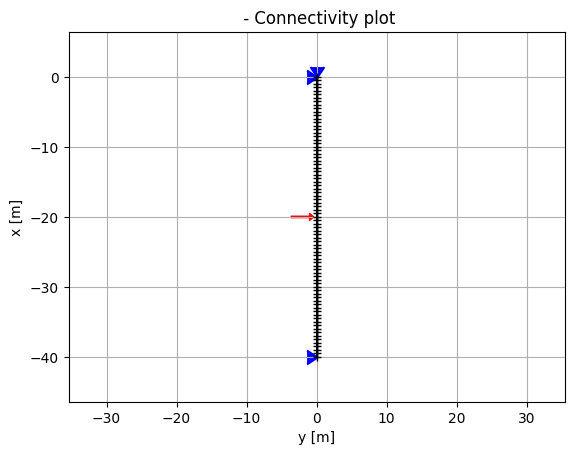

In [2]:
M.plot()


In [3]:
result.reactions


,Elevation [m],Nr [kN],Vr [kN],Mr [kNm]
0,0.0,0.0,-500.0,0.0
1,-40.0,0.0,-500.0,0.0


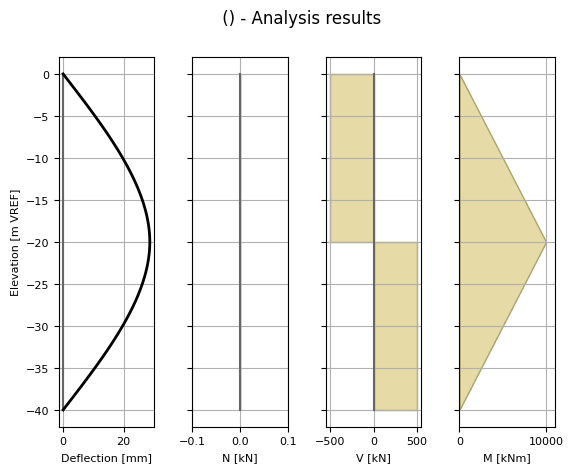

In [4]:
result.plot()
